In [1]:
import sys
import os

solver_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "solver"))
if solver_dir not in sys.path:
    sys.path.append(solver_dir)
from jkoSpinn import *

#### EXP 1 : Ornstein-Uhlenbeck Process


EXPERIMENT 1: Ornstein-Uhlenbeck Process

True: theta=1.7, mu=0.15, sigma=0.7
Generated 10 trajectories with 110 observations


100%|██████████| 5000/5000 [01:01<00:00, 81.48it/s, L=0.126451, D=0.49201047, mu=0.15000038, theta=1.69982338, sigma=0.70143461]   



------------------------------------------------------------
OU Process Results:
------------------------------------------------------------
sigma   : 0.701435 (true: 0.700000, RE: 0.2049%)
mu      : 0.150000 (true: 0.150000, RE: 0.0002%)
theta   : 1.699823 (true: 1.700000, RE: 0.0104%)


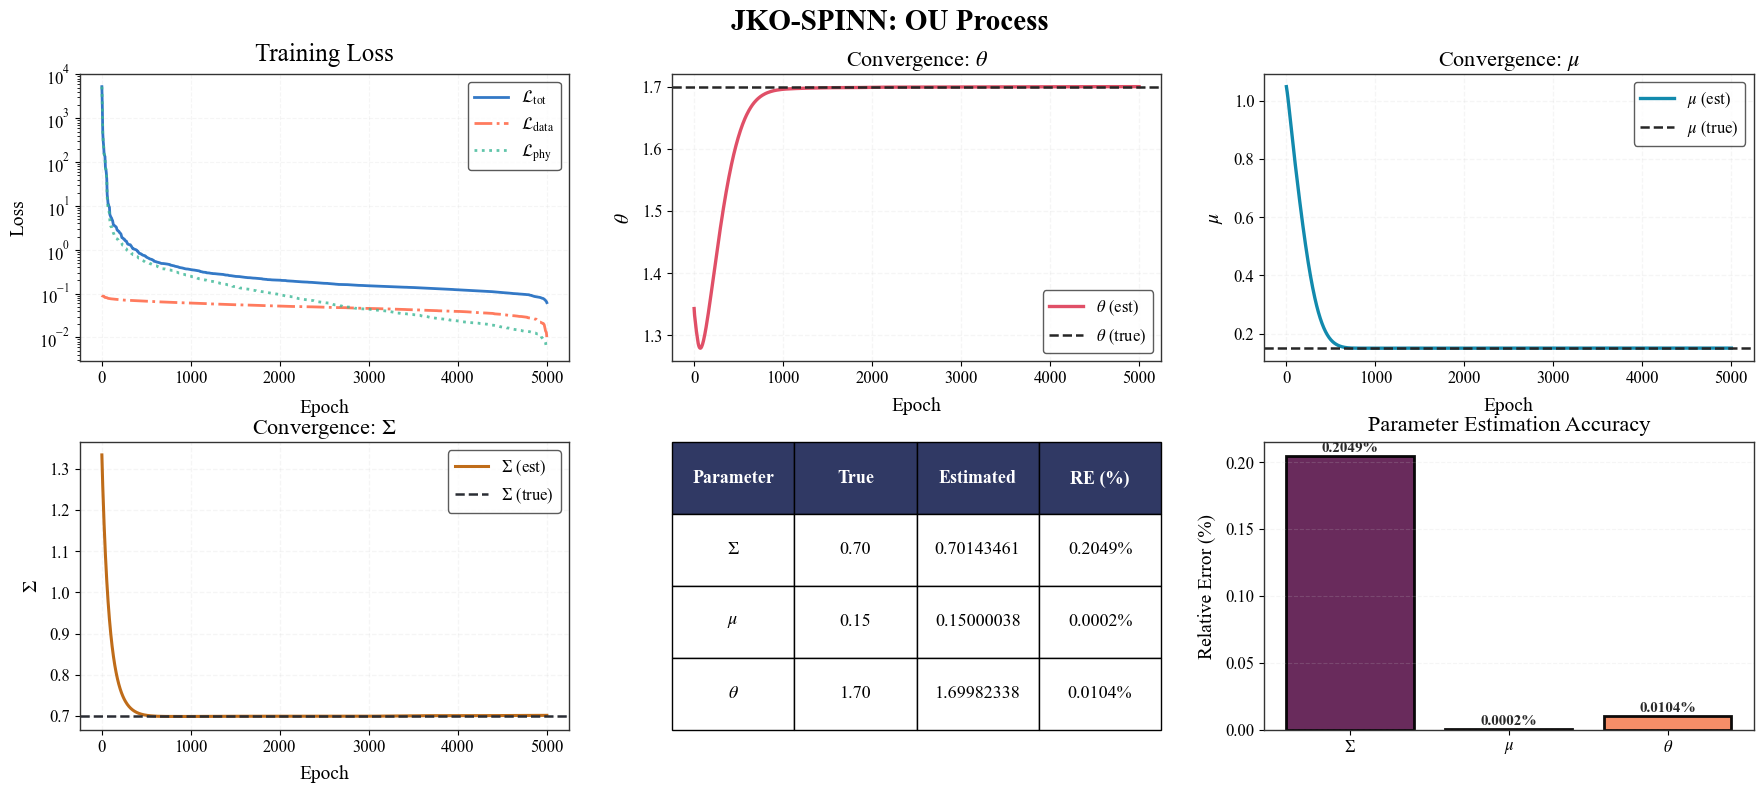

In [2]:
config = Config()
key = random.PRNGKey(config.seed)
print("\n" + "="*60)
print("EXPERIMENT 1: Ornstein-Uhlenbeck Process")
print("="*60 + "\n")
ou_process = OUProcess(theta=1.7, mu=0.15, sigma=0.7)
print(f"True: theta=1.7, mu=0.15, sigma=0.7")
key, subkey = random.split(key)
data_ou = generate_data(subkey, ou_process, config)
print(f"Generated {config.n_trajectories} trajectories with {len(data_ou['observations'])} observations")
key, subkey = random.split(key)
params_net_ou, params_phys_ou, history_ou = train_jko_spinn(subkey, data_ou, ou_process, config, verbose=True)
results_ou = evaluate_results(params_phys_ou, ou_process, history_ou)
print("\n" + "-"*60)
print("OU Process Results:")
print("-"*60)
for param_name, metrics in results_ou.items():
    print(f"{param_name:8s}: {metrics['estimated']:.6f} "
        f"(true: {metrics['true']:.6f}, "
        f"RE: {metrics['relative_error']*100:.4f}%)")
plot_results(history_ou, results_ou, ou_process, save_path="jko_spinn_OU.png")

### EXP 2 : Double-Well Process


EXPERIMENT 2: Double-Well Process

True: alpha=1.0, sigma=0.8
Generated 10 trajectories with 110 observations


100%|██████████| 5000/5000 [01:07<00:00, 74.38it/s, L=12.290033, D=0.57543081, alpha=0.91005111]  



------------------------------------------------------------
Double-Well Process Results:
------------------------------------------------------------
sigma   : 0.758572 (true: 0.800000, RE: 5.1786%)
alpha   : 0.910051 (true: 1.000000, RE: 8.9949%)


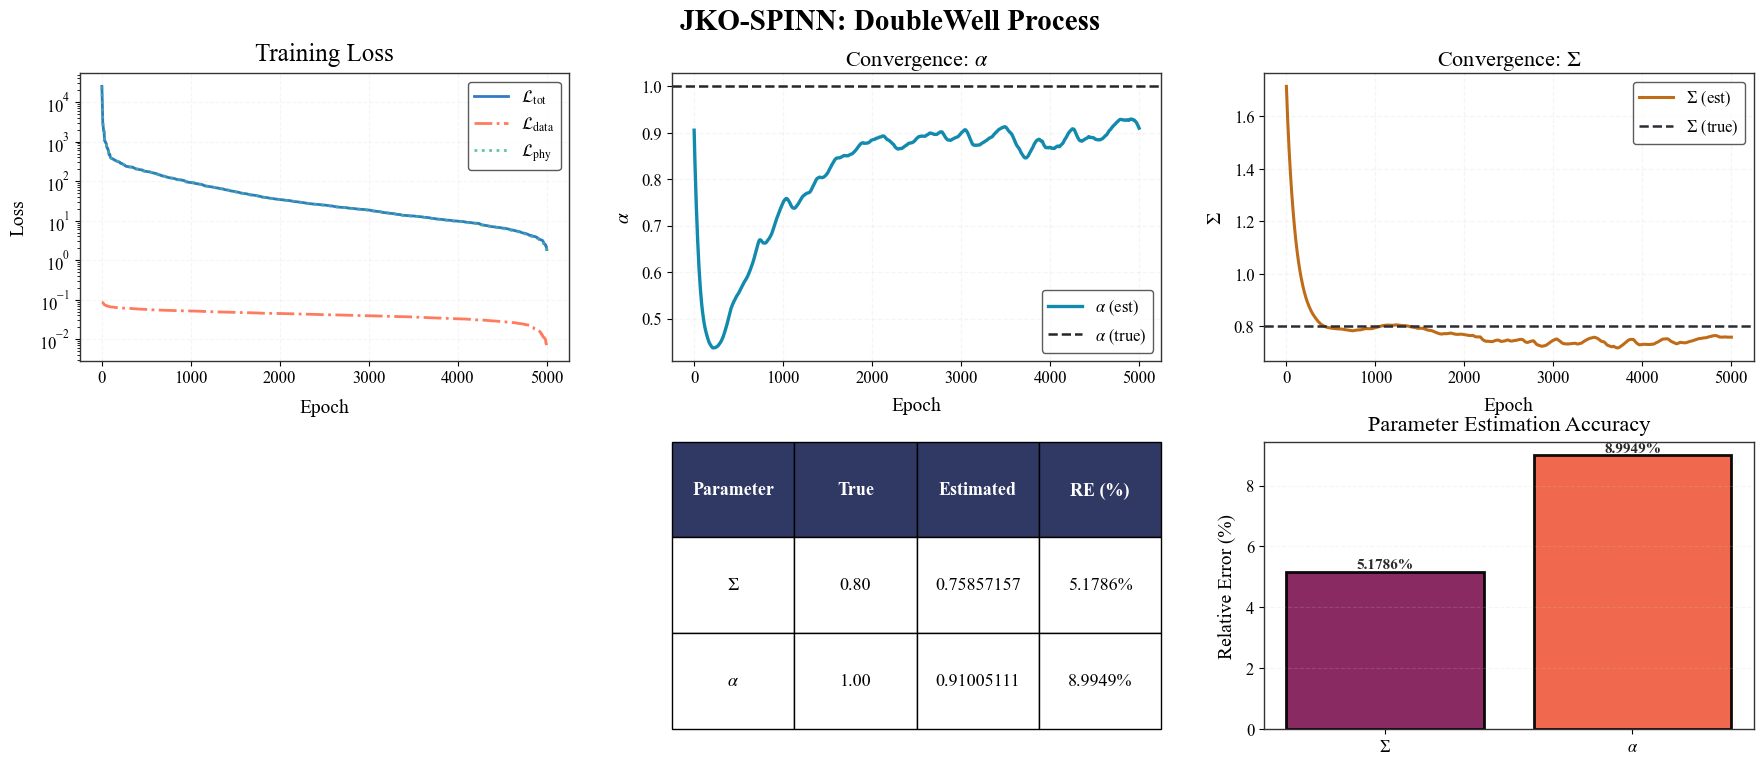

In [4]:
config = Config()
key = random.PRNGKey(config.seed)
print("\n" + "="*60)
print("EXPERIMENT 2: Double-Well Process")
print("="*60 + "\n")
dw_process = DoubleWellProcess(alpha=1.0, sigma=0.8)
key, subkey = random.split(key)
print('True: alpha=1.0, sigma=0.8')
data_dw = generate_data(subkey, dw_process, config)
print(f"Generated {config.n_trajectories} trajectories with {len(data_dw['observations'])} observations")
key, subkey = random.split(key)
params_net_dw, params_phys_dw, history_dw = train_jko_spinn(subkey, data_dw, dw_process, config, verbose=True)
results_dw = evaluate_results(params_phys_dw, dw_process, history_dw)
print("\n" + "-"*60)
print("Double-Well Process Results:")
print("-"*60)
for param_name, metrics in results_dw.items():
    print(f"{param_name:8s}: {metrics['estimated']:.6f} "
        f"(true: {metrics['true']:.6f}, "
        f"RE: {metrics['relative_error']*100:.4f}%)")
plot_results(history_dw, results_dw, dw_process, save_path="jko_spinn_DW.png")

### Multi-Init test

In [5]:
print("\n" + "="*60)
print("EXPERIMENT 3: Multi-Initialization ")
print("="*60)
key, subkey = random.split(key)
results_multi = multi_init_experiment(subkey, data_dw, dw_process, config, n_runs=10)
print("\n" + "="*30)
print("All experiments completed!")
print("="*30 + "\n")


EXPERIMENT 3: Multi-Initialization 

Multi-Initialization Experiment: 10 runs

Run 1/10...
  sigma: 0.650161 (true: 0.800000, RE: 18.7299%)
  alpha: 0.927401 (true: 1.000000, RE: 7.2599%)
Run 2/10...
  sigma: 0.773133 (true: 0.800000, RE: 3.3583%)
  alpha: 0.952860 (true: 1.000000, RE: 4.7140%)
Run 3/10...
  sigma: 0.797248 (true: 0.800000, RE: 0.3440%)
  alpha: 0.981960 (true: 1.000000, RE: 1.8040%)
Run 4/10...
  sigma: 0.798149 (true: 0.800000, RE: 0.2314%)
  alpha: 0.964851 (true: 1.000000, RE: 3.5149%)
Run 5/10...
  sigma: 0.798876 (true: 0.800000, RE: 0.1405%)
  alpha: 0.984547 (true: 1.000000, RE: 1.5453%)
Run 6/10...
  sigma: 0.787088 (true: 0.800000, RE: 1.6140%)
  alpha: 0.946662 (true: 1.000000, RE: 5.3338%)
Run 7/10...
  sigma: 0.793498 (true: 0.800000, RE: 0.8127%)
  alpha: 0.983220 (true: 1.000000, RE: 1.6780%)
Run 8/10...
  sigma: 0.798419 (true: 0.800000, RE: 0.1976%)
  alpha: 0.963427 (true: 1.000000, RE: 3.6573%)
Run 9/10...
  sigma: 0.794560 (true: 0.800000, RE: 0.68

In [ ]:
def other():
    config = Config()
    key = random.PRNGKey(config.seed)
    # 4. Sparsity
    print("\n=== Sparsity ===")
    res_s = []
    for n in [10, 30]:
        print(f"N={n}")
        c = config._replace(n_trajectories=n)
        key, k = random.split(key)
        d = generate_data(k, dw, c)
        key, k = random.split(key)
        _, p, h = train_jko_spinn(k, d, dw, c, verbose=False)
        res_s.append({"n_traj": n, "results": evaluate_results(
            p, dw, h), "final_loss": h["loss_total"][-1]})
    plot_sparsity_results(res_s, dw)#,"sparsity.png")

    # 5. Ablation
    print("\n=== Ablation ===")
    res_h = []
    for m in [1, 5]:
        print(f"M={m}")
        c = config._replace(n_hutchinson_samples=m)
        key, k = random.split(key)
        _, p, h = train_jko_spinn(k, data_dw, dw, c, verbose=False)
        res_h.append({"M": m, "results": evaluate_results(p, dw, h)})
    plot_ablation_results(res_h, [])#, "ablation.png")
    
    
other()